# Linear Regression Assignment - "Bike Sharing Assignment"

## Introduction

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

(taken from descrption)

## Problem Statement

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

## Data understanding, preparation and EDA

### Importing Libraries and Data

In [129]:
#importing all the neccesary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# ignoring all the warnings
warnings.filterwarnings('ignore')

In [130]:
# reading the dataframe

df = pd.read_csv("day.csv")

In [131]:
# reading data 

df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Data Understanding 

In [132]:
# looking at dataframe shape

df.shape

(730, 16)

In [133]:
# looking at dataframe info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


So we can conclude 
1. There are 730 rows and 16 columns.
2. They values are non-null.
3. We dont have null values in the dataset.

### Data Preparation 

We can drop 
- instant as we dont need index, we can use default indexing 
- dteday as we already have date, month and year
- casual as this is not predictor field we have cnt
- registered as this is not predictor field we have cnt

In [134]:
#dropping columns 

df = df.drop(['instant','dteday', 'casual', 'registered'],axis =1)

In [135]:
df.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600
5,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,1606
6,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,1510
7,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,959
8,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,822
9,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,1321


### Handeling Categorical variables

In [136]:
# Converting Categorical variables into meaningful data

# data preparation for changes - lets start column wise 

season = ['Spring', 'Summer', 'Fall', 'Winter']
yr = ['2018','2019']
mnth = ['January', 'Februrary', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
holiday = ['No', 'Yes']
weekday = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
workingday = ['No', 'Yes']
weathersit = ['Clear', 'Mist-Cloudy', 'Light-Snow', 'Heavy Rain-Ice Pallets-Thunderstorm-Mist']

In [137]:
df["season"] = df["season"].apply(lambda x: season[x-1])
df["yr"] = df["yr"].apply(lambda x: yr[x])
df["mnth"] = df["mnth"].apply(lambda x: mnth[x-1])
df["holiday"] = df["holiday"].apply(lambda x: holiday[x])
df["weekday"] = df["weekday"].apply(lambda x: weekday[x])
df["workingday"] = df["workingday"].apply(lambda x: workingday[x])
df["weathersit"] = df["weathersit"].apply(lambda x: weathersit[x-1])

In [138]:
df.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,2018,January,No,Saturday,No,Mist-Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,2018,January,No,Sunday,No,Mist-Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,2018,January,No,Monday,Yes,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,2018,January,No,Tuesday,Yes,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,2018,January,No,Wednesday,Yes,Clear,9.305237,11.46350,43.6957,12.522300,1600
5,Spring,2018,January,No,Thursday,Yes,Clear,8.378268,11.66045,51.8261,6.000868,1606
6,Spring,2018,January,No,Friday,Yes,Mist-Cloudy,8.057402,10.44195,49.8696,11.304642,1510
7,Spring,2018,January,No,Saturday,No,Mist-Cloudy,6.765000,8.11270,53.5833,17.875868,959
8,Spring,2018,January,No,Sunday,No,Clear,5.671653,5.80875,43.4167,24.250650,822
9,Spring,2018,January,No,Monday,Yes,Clear,6.184153,7.54440,48.2917,14.958889,1321


Now the data looks ready

### Data Visualising 

<Figure size 432x288 with 0 Axes>

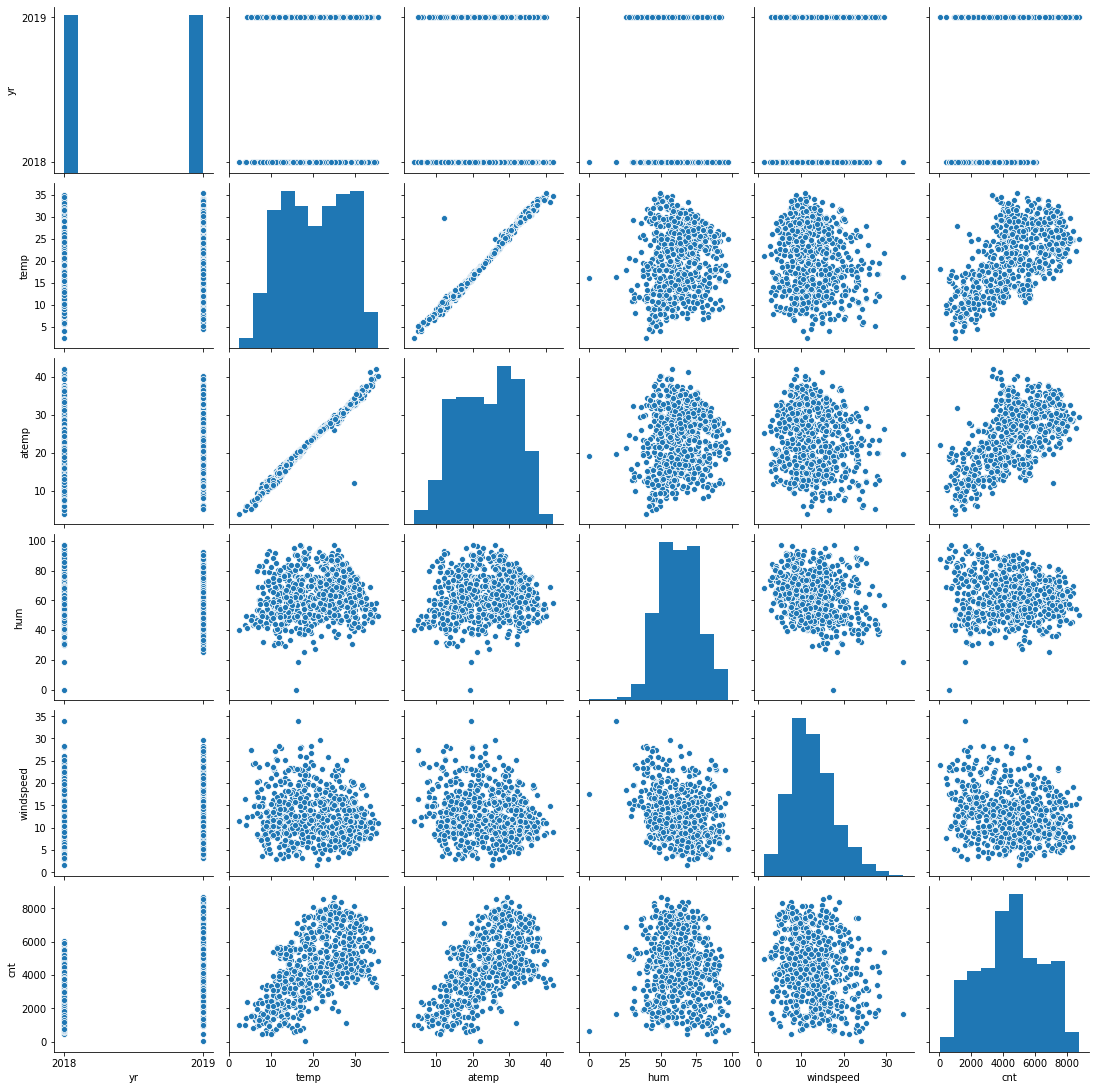

In [139]:
# Visualising the data 
plt.figure()
sns.pairplot(df)
plt.show()

We can conclude that 
- temp and atemp have a linear relationship i.e. directly proportional 
- cnt and temp have a minute linear relationship 
- cnt and temp have a minute linear relationship 

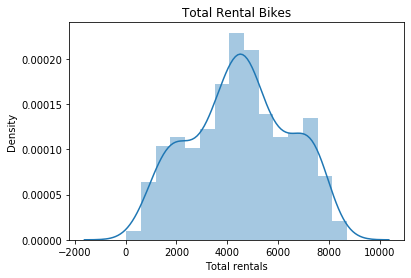

In [140]:
# lets take a look at cnt distribution 

sns.distplot(df.cnt, bins=15, kde=True)
plt.xlabel('Total rentals')
plt.ylabel('Density')
plt.title('Total Rental Bikes')
plt.show()

###### Insights

1. The retal distribution is concentrated among 4500-5000

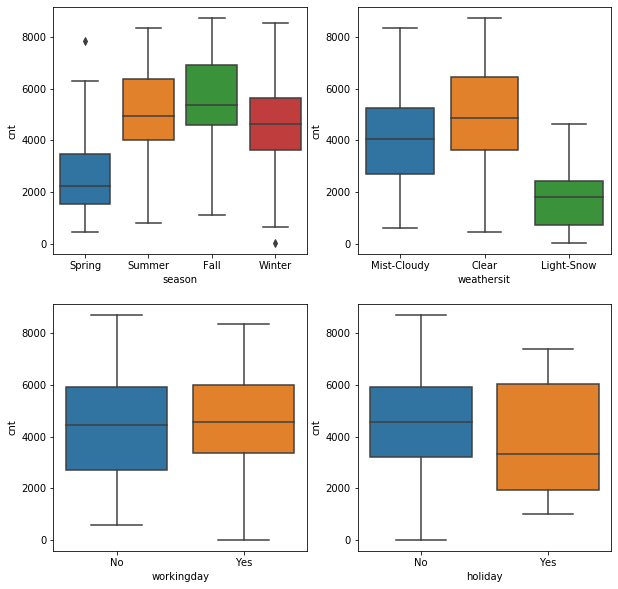

In [143]:
#Now let's plot categorical variables

# the boxplot 
plt.figure(figsize=(10, 10))
plt.subplot(2,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(2,2,2)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(2,2,3)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(2,2,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.show()

###### Insights

1. Fall has highest count followed by summar and winter.
2. Clear has more count then other 2
3. Working day => yes or no has less impact 
4. working days have more count.

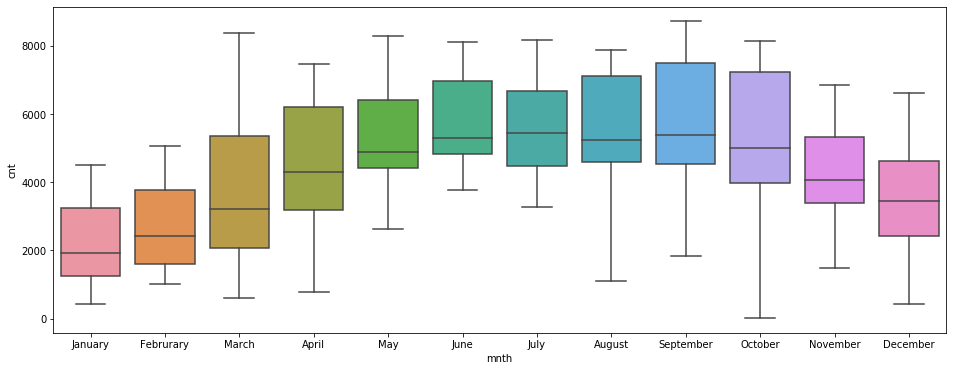

In [144]:
# lets try to plot the rental counts accross mnth 

fig = plt.figure(figsize = (16, 6))
sns.boxplot(df.mnth, df.cnt)
fig.show()

###### Insights

1. May, June, July, August, September months have highest no of bookings.
2. This can also due to wether effects

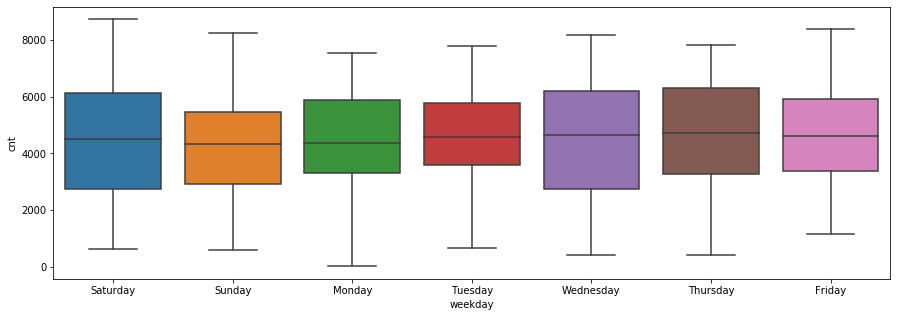

In [145]:
# lets try to plot the rental counts accross weekday

fig = plt.figure(figsize = (15, 5))
sns.boxplot(df.weekday, df.cnt)
plt.show()

###### Insights

1. Counts are same on weekday 

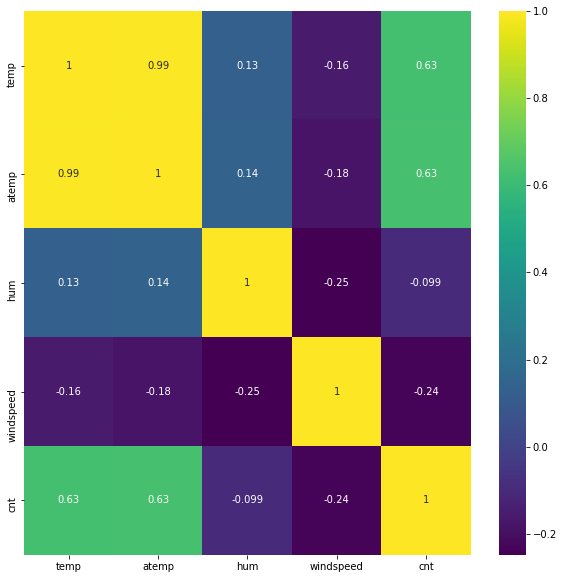

In [146]:
# lets see the correlation between variables 

plt.figure(figsize = (10, 10))
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.show()

###### Insights

1. temp and a atemp are highly correlated 
2. cnt-temp and cnt-atemp are moderatly correlated

### Creating Dummy variables

In [147]:
# lets create dummy variables for the categorical variables 

df = pd.get_dummies(df, drop_first=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   temp                    730 non-null    float64
 1   atemp                   730 non-null    float64
 2   hum                     730 non-null    float64
 3   windspeed               730 non-null    float64
 4   cnt                     730 non-null    int64  
 5   season_Spring           730 non-null    uint8  
 6   season_Summer           730 non-null    uint8  
 7   season_Winter           730 non-null    uint8  
 8   yr_2019                 730 non-null    uint8  
 9   mnth_August             730 non-null    uint8  
 10  mnth_December           730 non-null    uint8  
 11  mnth_Februrary          730 non-null    uint8  
 12  mnth_January            730 non-null    uint8  
 13  mnth_July               730 non-null    uint8  
 14  mnth_June               730 non-null    ui

### Splitting Data

In [148]:
# Splitting data into test and train set into 30-70%
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [149]:
# Verify 
df_train.shape

(510, 30)

In [150]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   temp                    510 non-null    float64
 1   atemp                   510 non-null    float64
 2   hum                     510 non-null    float64
 3   windspeed               510 non-null    float64
 4   cnt                     510 non-null    int64  
 5   season_Spring           510 non-null    uint8  
 6   season_Summer           510 non-null    uint8  
 7   season_Winter           510 non-null    uint8  
 8   yr_2019                 510 non-null    uint8  
 9   mnth_August             510 non-null    uint8  
 10  mnth_December           510 non-null    uint8  
 11  mnth_Februrary          510 non-null    uint8  
 12  mnth_January            510 non-null    uint8  
 13  mnth_July               510 non-null    uint8  
 14  mnth_June               510 non-null    u

In [151]:
df_test.shape

(219, 30)

In [152]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   temp                    219 non-null    float64
 1   atemp                   219 non-null    float64
 2   hum                     219 non-null    float64
 3   windspeed               219 non-null    float64
 4   cnt                     219 non-null    int64  
 5   season_Spring           219 non-null    uint8  
 6   season_Summer           219 non-null    uint8  
 7   season_Winter           219 non-null    uint8  
 8   yr_2019                 219 non-null    uint8  
 9   mnth_August             219 non-null    uint8  
 10  mnth_December           219 non-null    uint8  
 11  mnth_Februrary          219 non-null    uint8  
 12  mnth_January            219 non-null    uint8  
 13  mnth_July               219 non-null    uint8  
 14  mnth_June               219 non-null    u

In [153]:
df.shape

(730, 30)

### Scaler and Dividing data

#### Scaler

In [154]:
scaler = MinMaxScaler()

In [155]:
# On Trainning dataset apply scaler to all the numerical columns
num_vars = ['temp', 'hum', 'windspeed', 'atemp']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,yr_2019,mnth_August,...,holiday_Yes,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_Yes,weathersit_Light-Snow,weathersit_Mist-Cloudy
653,0.509887,0.501133,0.575354,0.300794,7534,0,0,1,1,0,...,0,0,0,0,0,1,0,1,0,0
576,0.815169,0.766351,0.725633,0.264686,7216,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
426,0.442393,0.438975,0.640189,0.255342,4066,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
728,0.245101,0.200348,0.498067,0.663106,1796,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
482,0.395666,0.391735,0.504508,0.188475,4220,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,1


####  Dividing data into Dependent and Independent Variables

In [156]:
y_train = df_train.pop('cnt')
X_train = df_train

## Building the model - Training Dataset

##### Imports

In [157]:
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

##### Model Building 

In [158]:
# Fitting Linear Regression 

lm = LinearRegression()
lm.fit(X_train, y_train)

# RFE
rfe = RFE(lm, 20)
rfe = rfe.fit(X_train, y_train)

In [159]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('yr_2019', True, 1),
 ('mnth_August', False, 2),
 ('mnth_December', True, 1),
 ('mnth_Februrary', True, 1),
 ('mnth_January', True, 1),
 ('mnth_July', True, 1),
 ('mnth_June', False, 9),
 ('mnth_March', False, 10),
 ('mnth_May', True, 1),
 ('mnth_November', True, 1),
 ('mnth_October', False, 6),
 ('mnth_September', True, 1),
 ('holiday_Yes', True, 1),
 ('weekday_Monday', False, 4),
 ('weekday_Saturday', True, 1),
 ('weekday_Sunday', False, 3),
 ('weekday_Thursday', False, 7),
 ('weekday_Tuesday', False, 5),
 ('weekday_Wednesday', False, 8),
 ('workingday_Yes', True, 1),
 ('weathersit_Light-Snow', True, 1),
 ('weathersit_Mist-Cloudy', True, 1)]

In [160]:
col = X_train.columns[rfe.support_]
col

Index(['temp', 'atemp', 'hum', 'windspeed', 'season_Spring', 'season_Summer',
       'season_Winter', 'yr_2019', 'mnth_December', 'mnth_Februrary',
       'mnth_January', 'mnth_July', 'mnth_May', 'mnth_November',
       'mnth_September', 'holiday_Yes', 'weekday_Saturday', 'workingday_Yes',
       'weathersit_Light-Snow', 'weathersit_Mist-Cloudy'],
      dtype='object')

In [161]:
X_train.columns[~rfe.support_]

Index(['mnth_August', 'mnth_June', 'mnth_March', 'mnth_October',
       'weekday_Monday', 'weekday_Sunday', 'weekday_Thursday',
       'weekday_Tuesday', 'weekday_Wednesday'],
      dtype='object')

In [162]:
# Creating X_test dataframe including RFE selected variables
X_train_rfe = X_train[col]

In [163]:
# lets use stats model for analysis
# Adding a constant column since sm does not provide with constant columns 
X_train_rfe = sm.add_constant(X_train_rfe)

# Running and fitting the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()  

In [164]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     141.1
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          1.94e-188
Time:                        16:07:41   Log-Likelihood:                -4099.5
No. Observations:                 510   AIC:                             8241.
Df Residuals:                     489   BIC:                             8330.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   2618.5541    334.253      7.834      0.000    1961.805    3275.303
temp                    3703.8619   1159.412      3.195      0.001    1425.817    5981.907
atemp                    219.5636   1173.115      0.187      0.852   -2085.404    2524.532
hum                    -1325.5980    326.916     -4.055      0.000   -1967.931    -683.265
windspeed              -1615.7071    224.989     -7.181      0.000   -2057.771   -1173.643
season_Spring           -491.6249    191.949     -2.561      0.011    -868.771    -114.479
season_Summer            228.7718    149.940      1.526      0.128     -65.835     523.379
season_Winter            873.9347    157.060      5.564      0.000     565.339    1182.531
yr_2019                 2014.2845     69.169     29.121      0.000    1878.379    2150.190
mnth_December           -440.4168    156.915     -2.807      0.005    -748.729    -132.105
mnth_Februrary          -307.9582    185.662     -1.659      0.098    -672.752      56.835
mnth_January            -571.1921    184.238     -3.100      0.002    -933.188    -209.196
mnth_July               -447.0920    156.251     -2.861      0.004    -754.099    -140.085
mnth_May                 218.4112    150.342      1.453      0.147     -76.986     513.808
mnth_November           -420.5175    162.261     -2.592      0.010    -739.332    -101.703
mnth_September           621.8739    144.694      4.298      0.000     337.575     906.173
holiday_Yes             -425.0344    234.029     -1.816      0.070    -884.861      34.793
weekday_Saturday         475.3436    125.301      3.794      0.000     229.149     721.539
workingday_Yes           384.1626     99.386      3.865      0.000     188.887     579.438
weathersit_Light-Snow  -2225.5497    227.139     -9.798      0.000   -2671.839   -1779.261
weathersit_Mist-Cloudy  -520.3578     89.809     -5.794      0.000    -696.818    -343.898
==============================================================================
Omnibus:                       84.497   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              242.277
Skew:                          -0.794   Prob(JB):                     2.46e-53
Kurtosis:                       5.979   Cond. No.                         86.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Insights

1. value of R squared = 85.2 %
2. value of Adjusted R squared = 84.6 %
3. P(F stats) close to 0 (significant fit of the model)

In [165]:
# Calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,97.27
1,temp,59.58
2,atemp,53.94
5,season_Spring,5.90
7,season_Winter,4.02
6,season_Summer,3.62
11,mnth_January,2.38
3,hum,1.98
18,workingday_Yes,1.88
10,mnth_Februrary,1.87


In [166]:
# atemp has both high VIF and p value. let's start by dropping it and them build model again
X_train_rfe = X_train_rfe.drop(["atemp"], axis = 1)

In [167]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_rfe)

# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()   

In [168]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     148.8
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          1.59e-189
Time:                        16:07:42   Log-Likelihood:                -4099.5
No. Observations:                 510   AIC:                             8239.
Df Residuals:                     490   BIC:                             8324.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   2616.3965    333.725      7.840      0.000    1960.688    3272.105
temp                    3911.7767    331.625     11.796      0.000    3260.193    4563.360
hum                    -1322.4021    326.148     -4.055      0.000   -1963.223    -681.581
windspeed              -1623.8981    220.474     -7.365      0.000   -2057.089   -1190.708
season_Spring           -486.6241    189.893     -2.563      0.011    -859.729    -113.519
season_Summer            234.1872    146.977      1.593      0.112     -54.596     522.970
season_Winter            879.4297    154.140      5.705      0.000     576.574    1182.286
yr_2019                 2014.0920     69.093     29.150      0.000    1878.337    2149.847
mnth_December           -440.0719    156.750     -2.807      0.005    -748.057    -132.087
mnth_Februrary          -308.1581    185.476     -1.661      0.097    -672.584      56.268
mnth_January            -572.1219    183.990     -3.110      0.002    -933.628    -210.616
mnth_July               -445.0301    155.709     -2.858      0.004    -750.970    -139.091
mnth_May                 217.4598    150.109      1.449      0.148     -77.476     512.396
mnth_November           -420.1593    162.090     -2.592      0.010    -738.636    -101.682
mnth_September           623.6550    144.239      4.324      0.000     340.252     907.057
holiday_Yes             -426.7816    233.613     -1.827      0.068    -885.788      32.224
weekday_Saturday         475.2274    125.176      3.796      0.000     229.279     721.176
workingday_Yes           384.0849     99.287      3.868      0.000     189.004     579.166
weathersit_Light-Snow  -2228.6039    226.329     -9.847      0.000   -2673.299   -1783.909
weathersit_Mist-Cloudy  -520.8203     89.687     -5.807      0.000    -697.039    -344.602
==============================================================================
Omnibus:                       84.215   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              241.321
Skew:                          -0.792   Prob(JB):                     3.96e-53
Kurtosis:                       5.974   Cond. No.                         24.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Insights

1. value of R squared = 85.2 %
2. value of Adjusted R squared = 84.6 %

In [169]:
# Calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                  Features    VIF
0                    const  97.15
4            season_Spring   5.79
1                     temp   4.88
6            season_Winter   3.88
5            season_Summer   3.49
10            mnth_January   2.38
2                      hum   1.97
17          workingday_Yes   1.88
9           mnth_Februrary   1.87
13           mnth_November   1.81
16        weekday_Saturday   1.79
8            mnth_December   1.65
19  weathersit_Mist-Cloudy   1.58
12                mnth_May   1.52
11               mnth_July   1.49
14          mnth_September   1.34
18   weathersit_Light-Snow   1.28
3                windspeed   1.22
15             holiday_Yes   1.18
7                  yr_2019   1.04


In [170]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     148.8
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          1.59e-189
Time:                        16:07:42   Log-Likelihood:                -4099.5
No. Observations:                 510   AIC:                             8239.
Df Residuals:                     490   BIC:                             8324.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   2616.3965    333.725      7.840      0.000    1960.688    3272.105
temp                    3911.7767    331.625     11.796      0.000    3260.193    4563.360
hum                    -1322.4021    326.148     -4.055      0.000   -1963.223    -681.581
windspeed              -1623.8981    220.474     -7.365      0.000   -2057.089   -1190.708
season_Spring           -486.6241    189.893     -2.563      0.011    -859.729    -113.519
season_Summer            234.1872    146.977      1.593      0.112     -54.596     522.970
season_Winter            879.4297    154.140      5.705      0.000     576.574    1182.286
yr_2019                 2014.0920     69.093     29.150      0.000    1878.337    2149.847
mnth_December           -440.0719    156.750     -2.807      0.005    -748.057    -132.087
mnth_Februrary          -308.1581    185.476     -1.661      0.097    -672.584      56.268
mnth_January            -572.1219    183.990     -3.110      0.002    -933.628    -210.616
mnth_July               -445.0301    155.709     -2.858      0.004    -750.970    -139.091
mnth_May                 217.4598    150.109      1.449      0.148     -77.476     512.396
mnth_November           -420.1593    162.090     -2.592      0.010    -738.636    -101.682
mnth_September           623.6550    144.239      4.324      0.000     340.252     907.057
holiday_Yes             -426.7816    233.613     -1.827      0.068    -885.788      32.224
weekday_Saturday         475.2274    125.176      3.796      0.000     229.279     721.176
workingday_Yes           384.0849     99.287      3.868      0.000     189.004     579.166
weathersit_Light-Snow  -2228.6039    226.329     -9.847      0.000   -2673.299   -1783.909
weathersit_Mist-Cloudy  -520.8203     89.687     -5.807      0.000    -697.039    -344.602
==============================================================================
Omnibus:                       84.215   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              241.321
Skew:                          -0.792   Prob(JB):                     3.96e-53
Kurtosis:                       5.974   Cond. No.                         24.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [171]:
# Calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                  Features    VIF
0                    const  97.15
4            season_Spring   5.79
1                     temp   4.88
6            season_Winter   3.88
5            season_Summer   3.49
10            mnth_January   2.38
2                      hum   1.97
17          workingday_Yes   1.88
9           mnth_Februrary   1.87
13           mnth_November   1.81
16        weekday_Saturday   1.79
8            mnth_December   1.65
19  weathersit_Mist-Cloudy   1.58
12                mnth_May   1.52
11               mnth_July   1.49
14          mnth_September   1.34
18   weathersit_Light-Snow   1.28
3                windspeed   1.22
15             holiday_Yes   1.18
7                  yr_2019   1.04


In [172]:
X_train_rfe.columns

Index(['const', 'temp', 'hum', 'windspeed', 'season_Spring', 'season_Summer',
       'season_Winter', 'yr_2019', 'mnth_December', 'mnth_Februrary',
       'mnth_January', 'mnth_July', 'mnth_May', 'mnth_November',
       'mnth_September', 'holiday_Yes', 'weekday_Saturday', 'workingday_Yes',
       'weathersit_Light-Snow', 'weathersit_Mist-Cloudy'],
      dtype='object')

### Predictions and Residual Analysis

In [173]:
# Predictions on training data
y_train_pred = lm.predict(X_train_rfe)
residuals = y_train - y_train_pred

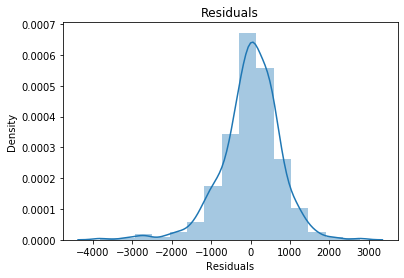

In [174]:
# Plottig distplot of residuals
sns.distplot(residuals, bins=15, kde=True)
plt.title('Residuals')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.show()

##### Insights

The curve shows normal distrubtion

### Predections

In [175]:
df_test.head()

,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,yr_2019,mnth_August,...,holiday_Yes,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_Yes,weathersit_Light-Snow,weathersit_Mist-Cloudy
184,29.793347,33.27085,63.7917,5.459106,6043,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,1
535,32.082500,36.04875,59.2083,7.625404,6211,0,1,0,1,0,...,0,0,0,0,0,0,1,1,0,0
299,19.270000,22.85230,81.2917,13.250121,2659,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,1
221,31.433347,34.24915,42.4167,13.417286,4780,0,0,0,0,1,...,0,0,0,0,0,0,1,1,0,0
152,29.315000,32.19710,30.5000,19.583229,4968,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [176]:
# Transforming the numerical variables using same scaler fitted on training data
#applying scaler
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,yr_2019,mnth_August,...,holiday_Yes,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_Yes,weathersit_Light-Snow,weathersit_Mist-Cloudy
184,0.831783,0.769660,0.657364,0.084219,6043,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,1
535,0.901354,0.842587,0.610133,0.153728,6211,0,1,0,1,0,...,0,0,0,0,0,0,1,1,0,0
299,0.511964,0.496145,0.837699,0.334206,2659,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,1
221,0.881625,0.795343,0.437098,0.339570,4780,0,0,0,0,1,...,0,0,0,0,0,0,1,1,0,0
152,0.817246,0.741471,0.314298,0.537414,4968,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [177]:
# Seperating X and Y for test set
y_test = df_test.pop('cnt')
X_test = df_test

In [178]:
X_train_rfe.head()

,const,temp,hum,windspeed,season_Spring,season_Summer,season_Winter,yr_2019,mnth_December,mnth_Februrary,mnth_January,mnth_July,mnth_May,mnth_November,mnth_September,holiday_Yes,weekday_Saturday,workingday_Yes,weathersit_Light-Snow,weathersit_Mist-Cloudy
653,1.0,0.509887,0.575354,0.300794,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0
576,1.0,0.815169,0.725633,0.264686,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
426,1.0,0.442393,0.640189,0.255342,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
728,1.0,0.245101,0.498067,0.663106,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
482,1.0,0.395666,0.504508,0.188475,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1


In [179]:
# Excluding constant variable for now
X_test_rfe = X_test[X_train_rfe.columns[1:]]

In [180]:
# Adding a constant variable column 
X_test_rfe = sm.add_constant(X_test_rfe)

In [181]:
# Prediction
y_test_pred = lm.predict(X_test_rfe)

### r2 Score

In [182]:
print("Training dataset r2 Score= ", r2_score(y_train, y_train_pred))

Training dataset r2 Score=  0.8523147121225637


In [183]:
print("test dataset r2 Score = ", r2_score(y_test, y_test_pred))

test dataset r2 Score =  0.827832979096587


In [184]:
#coff for best fit
round(lm.params,4)

const                     2616.3965
temp                      3911.7767
hum                      -1322.4021
windspeed                -1623.8981
season_Spring             -486.6241
season_Summer              234.1872
season_Winter              879.4297
yr_2019                   2014.0920
mnth_December             -440.0719
mnth_Februrary            -308.1581
mnth_January              -572.1219
mnth_July                 -445.0301
mnth_May                   217.4598
mnth_November             -420.1593
mnth_September             623.6550
holiday_Yes               -426.7816
weekday_Saturday           475.2274
workingday_Yes             384.0849
weathersit_Light-Snow    -2228.6039
weathersit_Mist-Cloudy    -520.8203
dtype: float64

### Best Fit Line

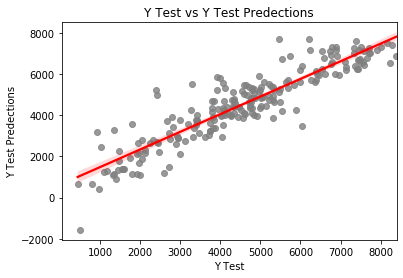

In [185]:
plt.figure()
sns.regplot(x = y_test, y = y_test_pred, fit_reg = True, scatter_kws = {"color": "grey"}, line_kws={"color": "red"})
plt.title('Y Test vs Y Test Predections')
plt.xlabel('Y Test')
plt.ylabel('Y Test Predections')
plt.show()